In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path
dd = Path('/workspaces/marketing-data/data')

In [8]:
busg = gpd.read_file(dd / 'BUSINESS_SITES.zip')
busg.head()

,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,...,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,...,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,...,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,...,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,...,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,...,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (6180956.367 2128315.164)


In [11]:
busg.head().T

,0,1,2,3,4
APN,1010100900.0,1010100900.0,1010100900.0,1010100900.0,1010100900.0
BCCCODE,131.0,291.0,314.0,314.0,404.0
OWNNAM1,PACIFIC MARINE CREDIT UNION,HRB TAX GROUP INC,NORTH COUNTY PIZZA INC,PIAZZA MANAGEMENT CORPORATION,BRIDGESTONE RETAIL
OWNNAM2,None,H&R BLOCK #6438,DBA DOMINOS PIZZA #8357,OF SAN DIEGO,OPERATIONS LLC
OWNNAM3,None,None,None,PIAZZA FAMILY RESTAURANTS INC,DBA FIRESTONE COMPLT AUTO CARE
CAREOF,ATTN ACCOUNTING DEPT,ATTN BUSINESS PP TAX #6438,None,DBA MCDONALDS #34729,ATTN TAX DEPT
STRNUM,1278.0,1.0,0.0,23113.0,200.0
STRFRA,None,None,None,None,None
STRDIR,None,None,None,None,S
STRNAM,ROCKY POINT,H&R BLOCK,PO BOX 4489,PLAZA POINTE,4TH


In [34]:
b1 = pd.read_csv(dd / 'sd_business_a-k.csv')
b2 = pd.read_csv(dd / 'sd_business_k-z.csv')
bus = pd.concat([b2, b1])
bus.head()

,BUSINESS ACCT#,DBA NAME,OWNERSHIP TYPE,ADDRESS,CITY,ZIP,STATE,BUSINESS PHONE,OWNER NAME,CREATION DT,START DT,EXP DT,NAICS,ACTIVITY DESC
0,2003005773,L & B PLUMBING,SOLE,43779 PAYNE AVE,HEMET,92544-6658,CA,(619) 722-6268,BURVILLE L RICHARDSON,11/06/2002,11/06/2002,11/30/2024,8114,PERSONAL & HOUSEHOLD GOODS R&M
1,1996010172,L & C FOOD DISTRIBUTION INC,CORP,8724 APPROACH RD,SAN DIEGO,92154-7709,CA,NaN,L & C FOOD DISTRIBUTION INC,09/26/1996,10/01/1996,09/30/2024,422,"WHOLESALE TRADE, NONDURABLE GOODS"
2,1993007608,L & G PARTNERS,PARTNR,16215 KITTRIDGE ST,VAN NUYS,91406,CA,(818) 787-1400,GOODMAN/LAINER /LAINER,08/25/1993,08/20/1993,08/31/2024,233,"BUILDING, DEVELOPING & GENERAL CONTRACTING"
3,2019024208,L & G PROJECTS INC,SCORP,7940 HERSCHEL AVE,LA JOLLA,92037-4532,CA,(760) 696-2991,L & G PROJECTS INC,11/15/2019,12/01/2019,11/30/2024,45399,ALL OTHER MISCELLANEOUS STORE RETAILERS
4,2022012768,L & L AUTO BODY & PAINT INC,CORP,4185 COLLEGE AVE SUITE B,SAN DIEGO,92115-6706,CA,(619) 634-4100,L & L AUTO BODY & PAINT INC,10/17/2022,07/01/2022,06/30/2024,81112,AUTOMOTIVE BODY/PAINT/INTERIOR & GLASS REPAIR


In [39]:
t = busg.merge(bus, right_on='OWNER NAME', left_on='OWNNAM1')
len(t)

# FIXME update this using the code from the previous business data analysis. 

ad = ['COMPUTER SYSTEMS DESIGN & RELATED SERVICES',
       'PROFESSIONAL, SCIENTIFIC & TECHNICAL SERVICES',
       'OTH PROFESSIONAL/SCIENTIFIC/TECHNICAL SERVICE',
       'CUSTOM COMPUTER PROGRAMMING SERVICES', 'ON-LINE INFORMATION SERVICES']

t= t[t['ACTIVITY DESC'].isin(ad)]

cities = ['SAN DIEGO', 'LAKESIDE', 'SPRING VALLEY',  'LA JOLLA',
       'SAN MARCOS', 'POWAY', 'VISTA', 'SOLANA BEACH', 'SANTEE',
       'ESCONDIDO', 'NATIONAL CITY', 'CARLSBAD', 'EL CAJON', 'OCEANSIDE', 'CHULA VISTA']

sd_soft = t[t['CITY_x'].isin(cities)]

len(sd_soft)

405

In [52]:
bus[bus['DBA NAME'].str.contains('LEAGUE OF AMA')]

,BUSINESS ACCT#,DBA NAME,OWNERSHIP TYPE,ADDRESS,CITY,ZIP,STATE,BUSINESS PHONE,OWNER NAME,CREATION DT,START DT,EXP DT,NAICS,ACTIVITY DESC


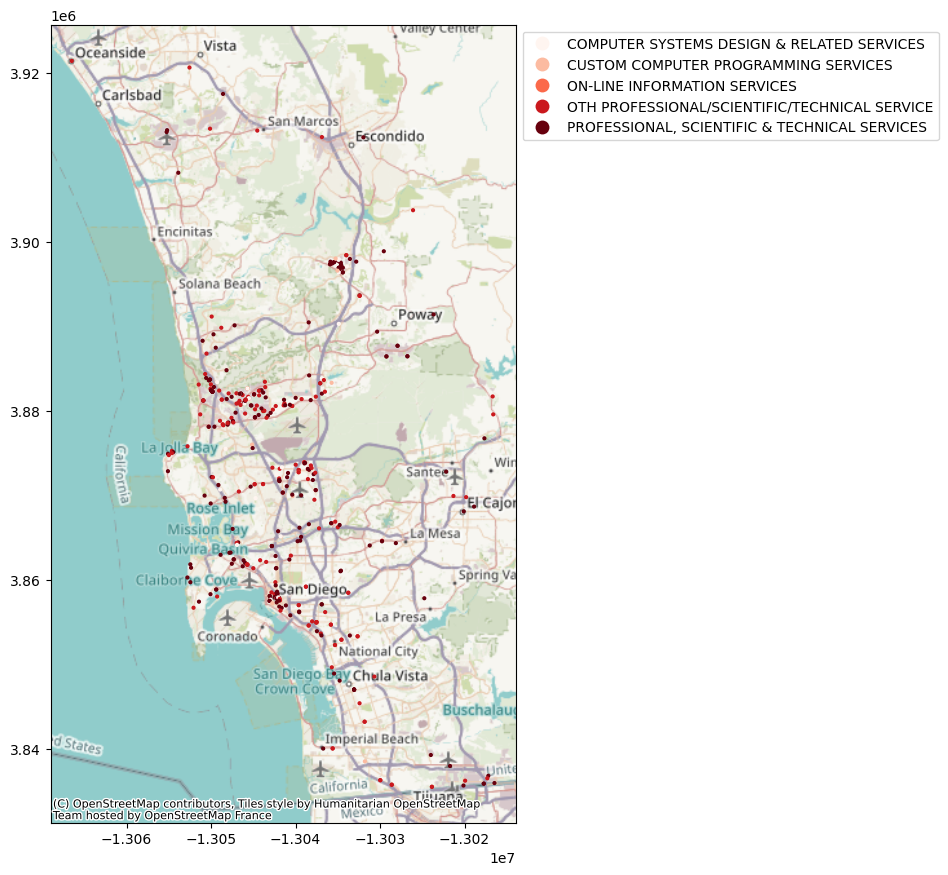

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6,15))  

t = sd_soft.to_crs(epsg=3857) # Make it web mercator to match the basemap

t.plot(markersize=4, column='ACTIVITY DESC', cmap='Reds',  legend=True, ax=ax)

cx.add_basemap(ax)
leg = ax.get_legend()                                                                         
leg.set_bbox_to_anchor((1, 1))  

